# Imported Libraries and Files

In [12]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import librosa
import seaborn as sns

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchaudio
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os

import random
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import matplotlib.pyplot

from utils.preprocessing import AudioDataset
from utils.models import Base_CNN, Base_CNN_Simplified, Base_CNN_Transformer, Base_CNN_GRU
from utils.train_utils import train_model, test_model, train_accuracy_model, plot_history, plot_confusion_matrix
from utils.data_loader import load_cremad, load_ravdess, load_tess, load_savee

# Necessary Paths

In [13]:
cremad_path = '/projectnb/ec523/projects/teamSER/cremad/'
ravdess_path = '/projectnb/ec523/projects/teamSER/ravdess/audio_speech_actors_01-24/'
tess_path = '/projectnb/ec523/projects/teamSER/tess/TESS Toronto emotional speech set data/'
savee_path = '/projectnb/ec523/projects/teamSER/savee/ALL/'

training_split = 0.8
testing_split = 0.2
batch_size = 32
sampling_rate = 22000

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Data Loading and Preprocessing

In [14]:
cremad_df = load_cremad(cremad_path)
# ravdess_df = load_ravdess(ravdess_path)
# tess_df = load_tess(tess_path)
# savee_df = load_savee(savee_path)

In [15]:
# Create a dataframe that contains all the emotion labels and paths from all the datasets
df = pd.concat([cremad_df], axis=0)
df = df.reset_index(drop=True)
df = df[~df['Emotion'].isin(['calm', 'surprise'])]
df['Emotion'].value_counts()

Emotion
anger        1271
disgust      1271
happiness    1271
fear         1271
sadness      1271
neutral      1087
Name: count, dtype: int64

In [16]:
encoder = LabelEncoder()
df['Emotion'] = encoder.fit_transform(df['Emotion'])
df['Emotion'].value_counts()

Emotion
0    1271
1    1271
3    1271
2    1271
5    1271
4    1087
Name: count, dtype: int64

In [17]:
dataset = AudioDataset(df)

all_indices = list(range(len(dataset)))
all_labels = dataset.labels

train_idx, test_idx = train_test_split(
    all_indices, test_size=testing_split, stratify=all_labels, random_state=42)

train_set = torch.utils.data.Subset(dataset, train_idx)
test_set = torch.utils.data.Subset(dataset, test_idx)

train_set.dataset.transform = True
test_set.dataset.transform = False

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=4)

# Base CNN

In [18]:
model = Base_CNN().to(device)

criterion = nn.CrossEntropyLoss().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
trained_model, history = train_model(model, optimizer, criterion, device, train_loader, test_loader, num_epochs=35)

Epoch 1/35 - Loss: 320.6836 | Train Acc: 29.06% | Val Acc: 28.34%
Epoch 2/35 - Loss: 286.0198 | Train Acc: 35.09% | Val Acc: 34.45%
Epoch 3/35 - Loss: 276.2515 | Train Acc: 36.79% | Val Acc: 36.40%
Epoch 4/35 - Loss: 263.1549 | Train Acc: 45.54% | Val Acc: 44.39%
Epoch 5/35 - Loss: 247.0362 | Train Acc: 49.54% | Val Acc: 47.95%
Epoch 6/35 - Loss: 232.4054 | Train Acc: 53.03% | Val Acc: 50.30%
Epoch 7/35 - Loss: 225.8459 | Train Acc: 56.73% | Val Acc: 53.26%
Epoch 8/35 - Loss: 219.2119 | Train Acc: 54.26% | Val Acc: 52.12%
Epoch 9/35 - Loss: 207.7854 | Train Acc: 56.74% | Val Acc: 50.10%
Epoch 10/35 - Loss: 203.7049 | Train Acc: 55.92% | Val Acc: 50.37%
Epoch 11/35 - Loss: 198.0273 | Train Acc: 49.42% | Val Acc: 42.71%
Epoch 12/35 - Loss: 185.9717 | Train Acc: 69.68% | Val Acc: 60.78%
Epoch 13/35 - Loss: 178.6907 | Train Acc: 58.36% | Val Acc: 50.37%
Epoch 14/35 - Loss: 173.7914 | Train Acc: 73.90% | Val Acc: 62.12%
Epoch 15/35 - Loss: 168.6698 | Train Acc: 55.33% | Val Acc: 46.94%
Epoc

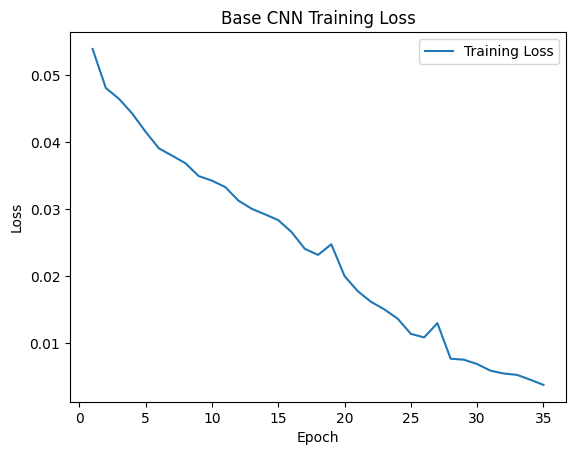

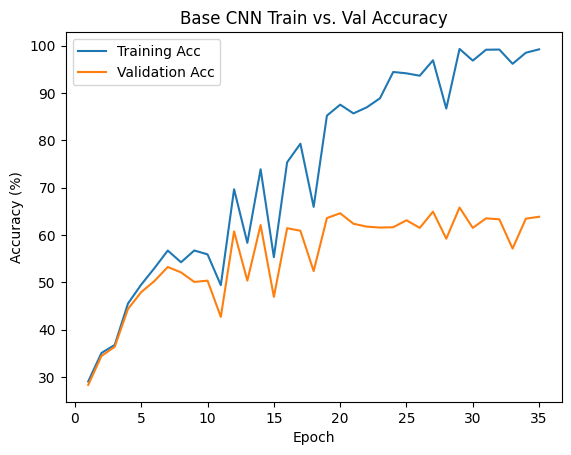

In [22]:
plot_history(history, 'Base CNN')

<Figure size 800x600 with 0 Axes>

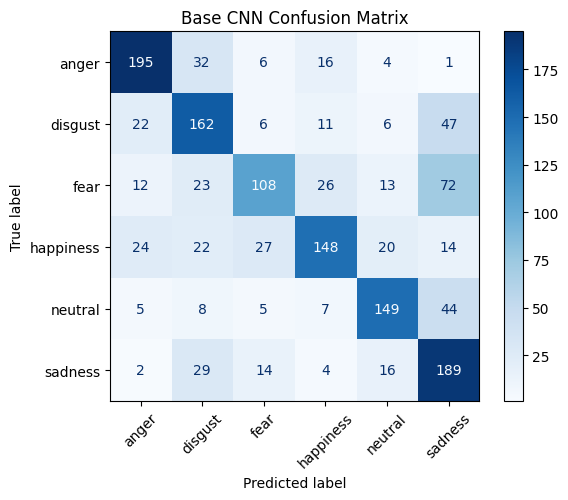

In [23]:
plot_confusion_matrix(trained_model, test_loader, device, "Base CNN Confusion Matrix")